In [1]:
import pandas as pd

## 데이터 받아오기

In [29]:
dust=pd.read_excel('/content/drive/MyDrive/dust.xlsx')
print(dust.head())#변수 앞의 5개 데이터 확인
print(dust.info())#데이터의 타입정보, 수, null여부를 판단한다.
print(dust.describe())#기초통계량 확인

              날짜  아황산가스  일산화탄소     오존  이산화질소  PM10  PM2.5
0  2023-01-01 01  0.004    0.9  0.003  0.051  51.0   37.0
1  2023-01-01 02  0.004    0.9  0.003  0.050  70.0   53.0
2  2023-01-01 03  0.004    0.7  0.009  0.039  73.0   53.0
3  2023-01-01 04  0.003    0.8  0.007  0.043  76.0   56.0
4  2023-01-01 05  0.004    0.7  0.018  0.026  82.0   59.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      768 non-null    object 
 1   아황산가스   764 non-null    float64
 2   일산화탄소   764 non-null    float64
 3   오존      764 non-null    float64
 4   이산화질소   764 non-null    float64
 5   PM10    765 non-null    float64
 6   PM2.5   765 non-null    float64
dtypes: float64(6), object(1)
memory usage: 42.1+ KB
None
            아황산가스       일산화탄소          오존       이산화질소        PM10       PM2.5
count  764.000000  764.000000  764.000000  764.000000  765.000000  765.000000
m

In [3]:
weather=pd.read_excel('/content/drive/MyDrive/weather.xlsx')
print(weather.head())
print(weather.info())
print(weather.describe())

    지점 지점명                  일시  기온(°C)  풍속(m/s)  강수량(mm)  습도(%)
0  400  강남 2023-01-01 00:00:00    -0.5      0.6      0.0     72
1  400  강남 2023-01-01 01:00:00     0.3      1.0      0.0     68
2  400  강남 2023-01-01 02:00:00    -0.1      0.4      0.0     72
3  400  강남 2023-01-01 03:00:00     0.0      0.3      0.0     75
4  400  강남 2023-01-01 04:00:00     0.5      0.4      0.0     75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       745 non-null    int64         
 1   지점명      745 non-null    object        
 2   일시       745 non-null    datetime64[ns]
 3   기온(°C)   745 non-null    float64       
 4   풍속(m/s)  745 non-null    float64       
 5   강수량(mm)  745 non-null    float64       
 6   습도(%)    745 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 40.9+ KB
None
          지점        

**미세먼지 데이터**

## 데이터 가공하기
- 컬럼명 영문변경
- 필요한 데이터만을 추출
- 커럼 순서 재정렬

In [46]:
dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2023-01-01 01,0.004,0.9,0.003,0.051,51.0,37.0
1,2023-01-01 02,0.004,0.9,0.003,0.050,70.0,53.0
2,2023-01-01 03,0.004,0.7,0.009,0.039,73.0,53.0
3,2023-01-01 04,0.003,0.8,0.007,0.043,76.0,56.0
4,2023-01-01 05,0.004,0.7,0.018,0.026,82.0,59.0


In [47]:
dust.rename(columns={'날짜':'date', '아황산가스':'so2','일산화탄소':'co','오존':'o3', '이산화질소':'no2'}, inplace=True)
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2023-01-01 01,0.004,0.9,0.003,0.051,51.0,37.0
1,2023-01-01 02,0.004,0.9,0.003,0.050,70.0,53.0
2,2023-01-01 03,0.004,0.7,0.009,0.039,73.0,53.0
3,2023-01-01 04,0.003,0.8,0.007,0.043,76.0,56.0
4,2023-01-01 05,0.004,0.7,0.018,0.026,82.0,59.0


In [6]:
dust.tail()

,date,so2,co,o3,no2,PM10,PM2.5
763,2023-02-01 20,0.0028,0.36,0.0257,0.0203,37.0,14.0
764,2023-02-01 21,0.0029,0.36,0.0292,0.0162,42.0,13.0
765,2023-02-01 22,0.0029,0.37,0.0289,0.0150,42.0,13.0
766,2023-02-01 23,0.0030,0.37,0.0280,0.0156,44.0,13.0
767,2023-02-01 24,0.0034,0.41,0.0250,0.0184,45.0,12.0


In [48]:
#분석에 필요한 년도-월-일만을 추출한다.
dust['date']=dust['date'].str[:11]#11까지만 문자열을 자른다.
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2023-01-01,0.004,0.9,0.003,0.051,51.0,37.0
1,2023-01-01,0.004,0.9,0.003,0.050,70.0,53.0
2,2023-01-01,0.004,0.7,0.009,0.039,73.0,53.0
3,2023-01-01,0.003,0.8,0.007,0.043,76.0,56.0
4,2023-01-01,0.004,0.7,0.018,0.026,82.0,59.0


In [49]:
#datetype을 데이터 타입으로 바꾸기
dust['date']=pd.to_datetime(dust['date'])
dust.dtypes

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [50]:
#연, 월, 일 따로 저장하기
dust['year']=dust['date'].dt.year
dust['month']=dust['date'].dt.month
dust['day']=dust['date'].dt.day
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [51]:
#컬럼 순서 재정렬
dust=dust[['date','year','month','day','so2','co','o3', 'no2', 'PM10', 'PM2.5']]
dust.columns

Index(['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10',
       'PM2.5'],
      dtype='object')

## 데이터 전처리
- 결측치 확인, 처리

In [11]:
#결측치 확인
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      4
co       4
o3       4
no2      4
PM10     3
PM2.5    3
dtype: int64

In [12]:
print(dust[dust['co'].isnull()])
print(dust[dust['PM10'].isnull()])

          date  year  month  day  so2  co  o3  no2  PM10  PM2.5
206 2023-01-09  2023      1    9  NaN NaN NaN  NaN  97.0   38.0
207 2023-01-09  2023      1    9  NaN NaN NaN  NaN  86.0   37.0
615 2023-01-26  2023      1   26  NaN NaN NaN  NaN   NaN    NaN
616 2023-01-26  2023      1   26  NaN NaN NaN  NaN   NaN    NaN
          date  year  month  day     so2   co      o3     no2  PM10  PM2.5
254 2023-01-11  2023      1   11  0.0042  0.8  0.0118  0.0645   NaN    NaN
615 2023-01-26  2023      1   26     NaN  NaN     NaN     NaN   NaN    NaN
616 2023-01-26  2023      1   26     NaN  NaN     NaN     NaN   NaN    NaN


In [13]:
#결측치 처리: 이전 데이터로 채우기, 없으면 특정값으로 채우기
dust=dust.fillna(method='pad')
dust.fillna(20,inplace=True)
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

**날씨 데이터**

In [14]:
weather.head()

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2023-01-01 00:00:00,-0.5,0.6,0.0,72
1,400,강남,2023-01-01 01:00:00,0.3,1.0,0.0,68
2,400,강남,2023-01-01 02:00:00,-0.1,0.4,0.0,72
3,400,강남,2023-01-01 03:00:00,0.0,0.3,0.0,75
4,400,강남,2023-01-01 04:00:00,0.5,0.4,0.0,75


In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       745 non-null    int64         
 1   지점명      745 non-null    object        
 2   일시       745 non-null    datetime64[ns]
 3   기온(°C)   745 non-null    float64       
 4   풍속(m/s)  745 non-null    float64       
 5   강수량(mm)  745 non-null    float64       
 6   습도(%)    745 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 40.9+ KB


## 데이터 가공하기
- 필요없는 컬럼들 삭제
- 컬럼명 변경, 데이터 제거

In [30]:
weather.drop(['지점명','지점'],axis=1,inplace=True)
weather.head()

KeyError: "['지점명', '지점'] not found in axis"

In [31]:
#컬럼 이름 변경
weather.columns=['date','temp','wind','rain','humid']
weather.head()

,date,temp,wind,rain,humid
0,2023-01-01,-0.5,0.6,0.01,72
1,2023-01-01,0.3,1.0,0.01,68
2,2023-01-01,-0.1,0.4,0.01,72
3,2023-01-01,0.0,0.3,0.01,75
4,2023-01-01,0.5,0.4,0.01,75


In [32]:
weather['date']=weather['date'].dt.date#시간 삭제하기

In [33]:
weather.info()#시간을 삭제하면 데이터 타입이 object로 변한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    745 non-null    object 
 1   temp    745 non-null    float64
 2   wind    745 non-null    float64
 3   rain    745 non-null    float64
 4   humid   745 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 29.2+ KB


In [34]:
weather['date']=pd.to_datetime(weather['date'])#다시 datetime으로  변경한다.

In [35]:
weather.head()

,date,temp,wind,rain,humid
0,2023-01-01,-0.5,0.6,0.01,72
1,2023-01-01,0.3,1.0,0.01,68
2,2023-01-01,-0.1,0.4,0.01,72
3,2023-01-01,0.0,0.3,0.01,75
4,2023-01-01,0.5,0.4,0.01,75


In [22]:
weather['rain']=weather['rain'].replace([0],0.01)
weather['rain'].value_counts()

rain
0.01     714
0.50      16
1.00       5
2.00       3
1.50       2
3.00       1
3.50       1
10.00      1
7.00       1
4.50       1
Name: count, dtype: int64

**데이터 병합**

In [44]:
dust.shape

(744, 7)

In [40]:
weather.shape

(744, 5)

In [38]:
weather.drop(index=0,inplace=True)

In [41]:
import numpy as np
dust.drop(index=np.arange(745,769), inplace=True)

In [53]:
df=pd.merge(dust,weather,on='date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.3,1.0,0.01,68
1,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,-0.1,0.4,0.01,72
2,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.0,0.3,0.01,75
3,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.5,0.4,0.01,75
4,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,2.0,1.2,0.01,59


In [54]:
df.index=df['date']
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,,,,,,,,,,,,,,
2023-01-01,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.3,1.0,0.01,68
2023-01-01,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,-0.1,0.4,0.01,72
2023-01-01,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.0,0.3,0.01,75
2023-01-01,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.5,0.4,0.01,75
2023-01-01,2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,2.0,1.2,0.01,59


In [56]:
df.drop(columns=['date'],inplace=True)
df.head()

,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,,,,,,,,,,,,,
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.3,1.0,0.01,68
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,-0.1,0.4,0.01,72
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.0,0.3,0.01,75
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.5,0.4,0.01,75
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,2.0,1.2,0.01,59


**데이터 분석 및 시각화**

In [57]:
df.shape

(17809, 13)

In [58]:
df.corr()

,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.012598,-0.000523,-0.005746,0.019437,-0.007043,0.001586,-0.001464,0.011298,0.009056,-0.000940,0.008173
day,NaN,-0.012598,1.000000,-0.482640,-0.514184,0.257063,-0.372660,-0.292675,-0.434338,-0.284030,0.267127,-0.041769,-0.114177
so2,NaN,-0.000523,-0.482640,1.000000,0.587996,-0.196477,0.549037,0.382959,0.442459,0.414057,-0.259314,0.055194,0.141376
co,NaN,-0.005746,-0.514184,0.587996,1.000000,-0.588638,0.768651,0.623404,0.746800,0.340065,-0.327863,0.026737,0.226443
o3,NaN,0.019437,0.257063,-0.196477,-0.588638,1.000000,-0.840454,-0.062774,-0.181046,-0.249024,0.386904,-0.071870,-0.197460
no2,NaN,-0.007043,-0.372660,0.549037,0.768651,-0.840454,1.000000,0.321916,0.437069,0.327640,-0.430489,0.036690,0.170272
PM10,NaN,0.001586,-0.292675,0.382959,0.623404,-0.062774,0.321916,1.000000,0.893667,0.237304,-0.087977,-0.074395,0.075155
PM2.5,NaN,-0.001464,-0.434338,0.442459,0.746800,-0.181046,0.437069,0.893667,1.000000,0.256271,-0.174876,-0.049212,0.168734
temp,NaN,0.011298,-0.284030,0.414057,0.340065,-0.249024,0.327640,0.237304,0.256271,1.000000,-0.148532,0.136418,0.224410


In [59]:
corr=df.corr()
corr['PM10'].sort_values(ascending=False)#미세먼지(PM10)을 기준으로 각 변수와의 상관관계를 알아본다.
#초미세먼지, 일산화탄소, 이산화 질소와 상관관계가 높다는 것을 알 수 있다.

PM10     1.000000
PM2.5    0.893667
co       0.623404
so2      0.382959
no2      0.321916
temp     0.237304
humid    0.075155
month    0.001586
o3      -0.062774
rain    -0.074395
wind    -0.087977
day     -0.292675
year          NaN
Name: PM10, dtype: float64

- 양의 상관
- 무상관
- 음의 상관
<hr>절댓값이 클수록 더 큰 상관관계를 가진다.

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>, <Axes: title={'center': 'so2'}>],
       [<Axes: title={'center': 'co'}>, <Axes: title={'center': 'o3'}>,
        <Axes: title={'center': 'no2'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'humid'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

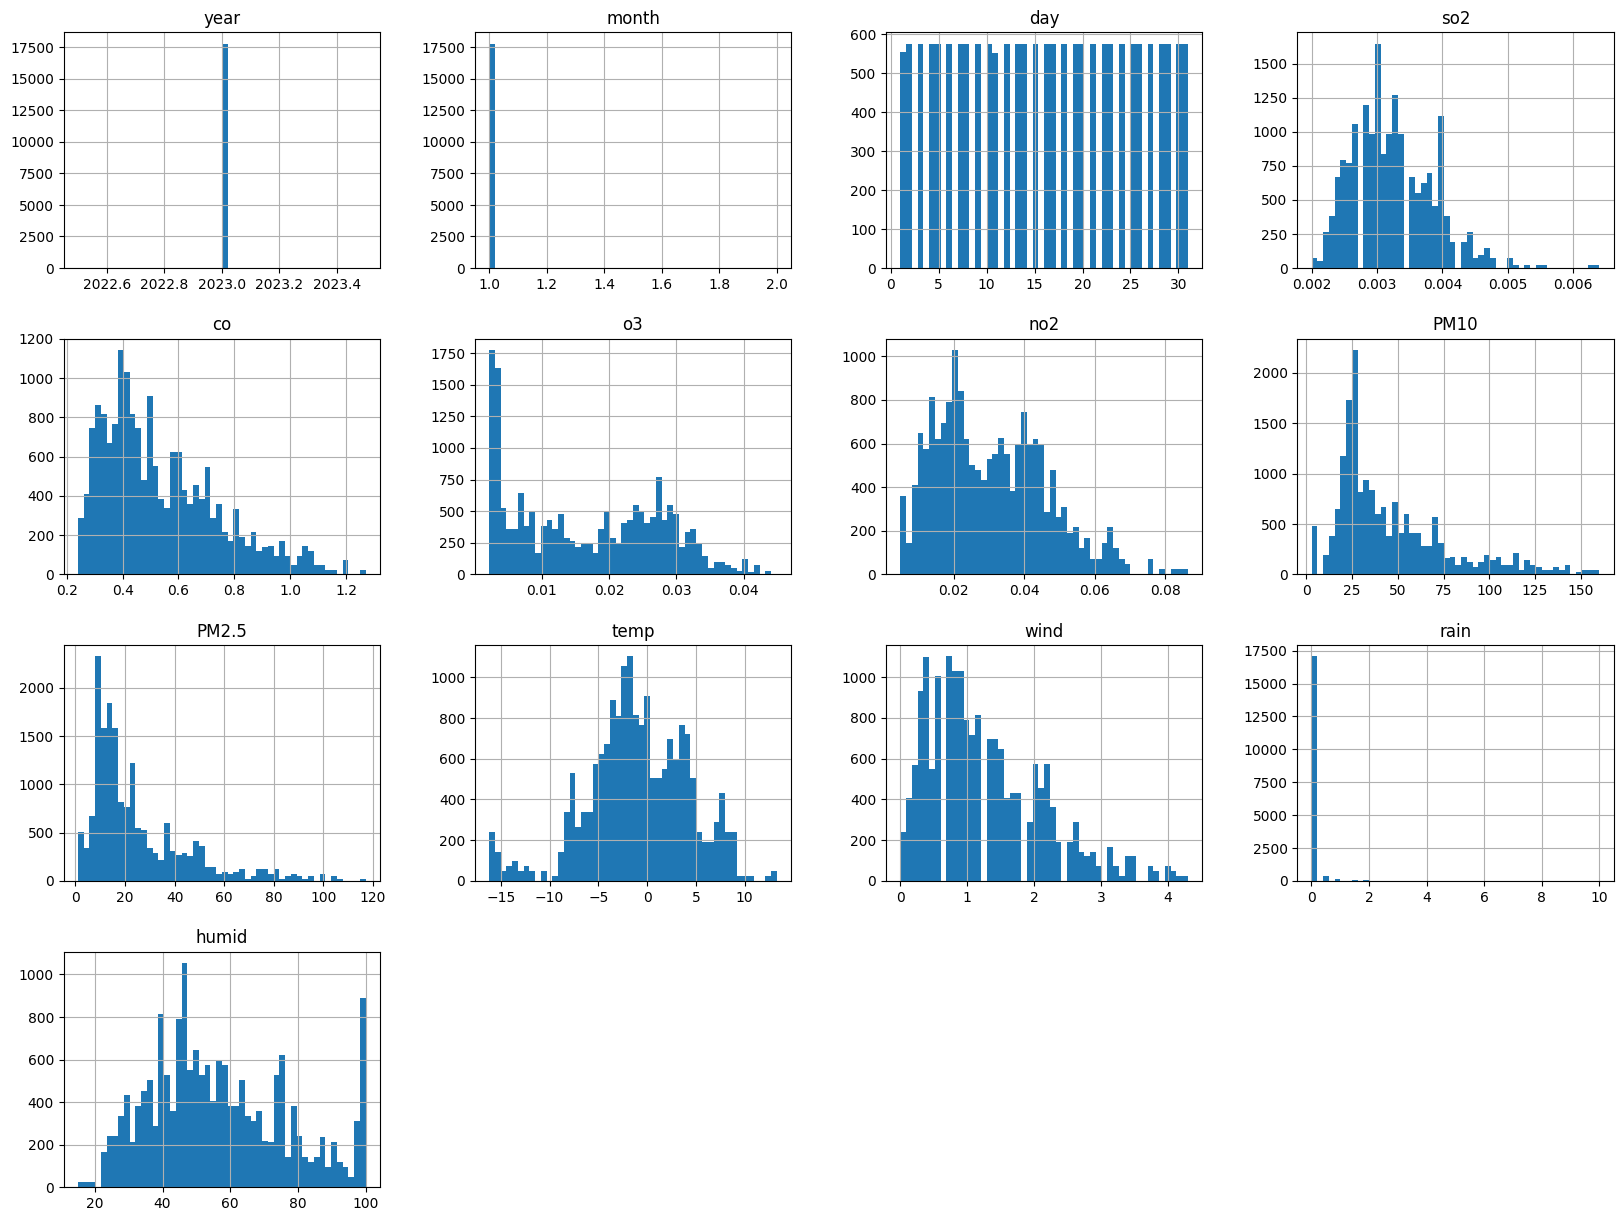

In [60]:
df.hist(bins=50,figsize=(20,15))
# 그래프 상으로 이산화질소, 오존, 미세먼지, 초미세먼지, 바람이 연관성 있어보인다.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df.head()

,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,,,,,,,,,,,,,
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.3,1.0,0.01,68
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,-0.1,0.4,0.01,72
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.0,0.3,0.01,75
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,0.5,0.4,0.01,75
2023-01-01,2023,1,1,0.004,0.9,0.003,0.051,51.0,37.0,2.0,1.2,0.01,59


In [73]:
df['day']

date
2023-01-01     1
2023-01-01     1
2023-01-01     1
2023-01-01     1
2023-01-01     1
              ..
2023-01-31    31
2023-01-31    31
2023-01-31    31
2023-01-31    31
2023-02-01     1
Name: day, Length: 17809, dtype: int32

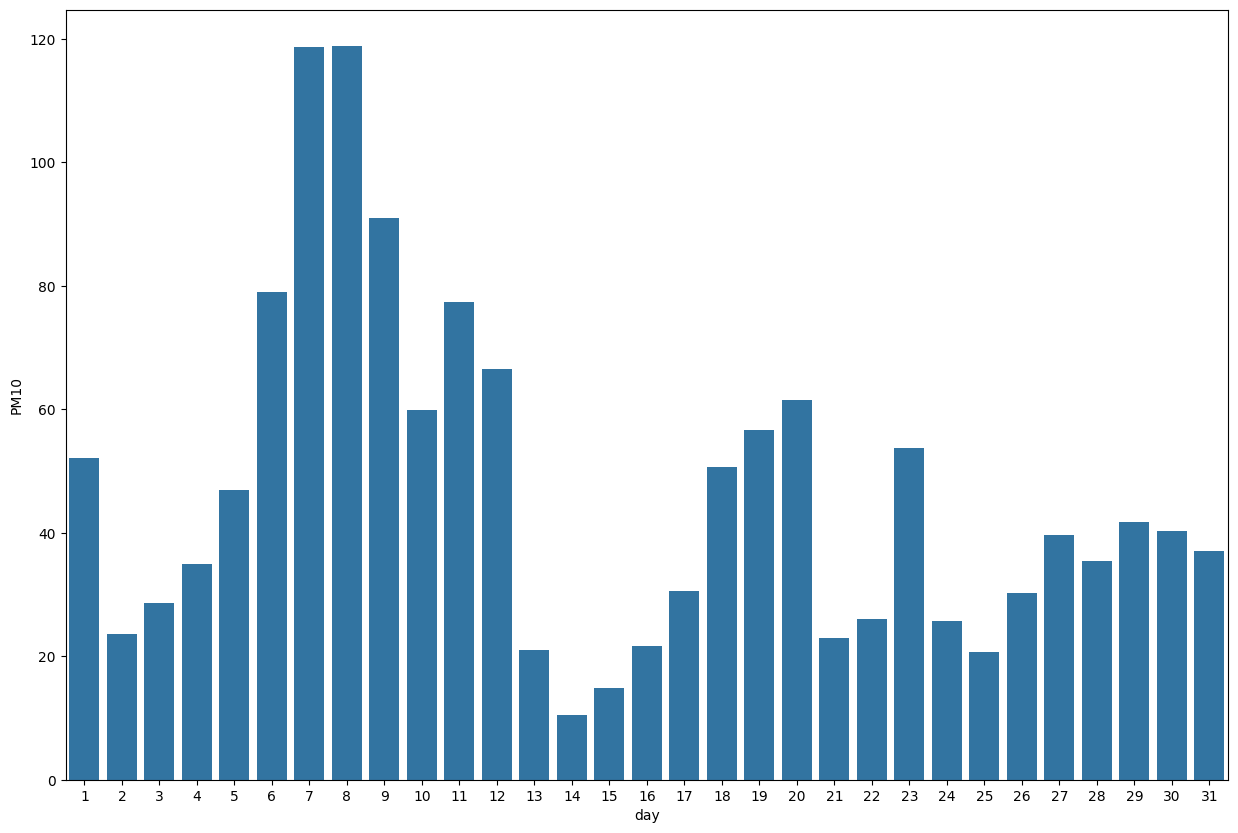

In [82]:
#일별 미세먼지 현황
groupDay=df.groupby('day').mean()
plt.figure(figsize=(15,10))
sns.barplot(x='day',y='PM10',data=groupDay)
plt.xticks(rotation=0)
plt.show()

<Axes: >

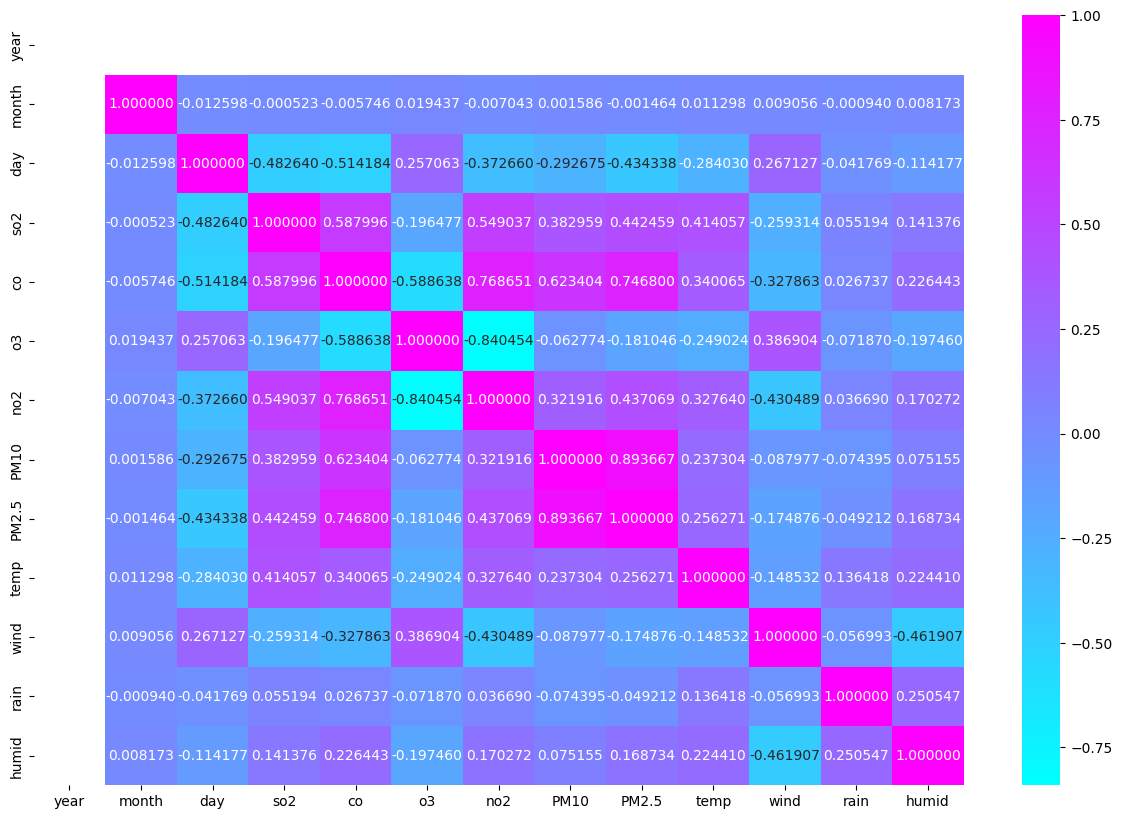

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(data=corr,annot=True,fmt='2f',cmap='cool')
#상관관계를 히트맵을 통해 표현, 상관 계수가 0.3이상인 것을 중점적으로 확인한다.

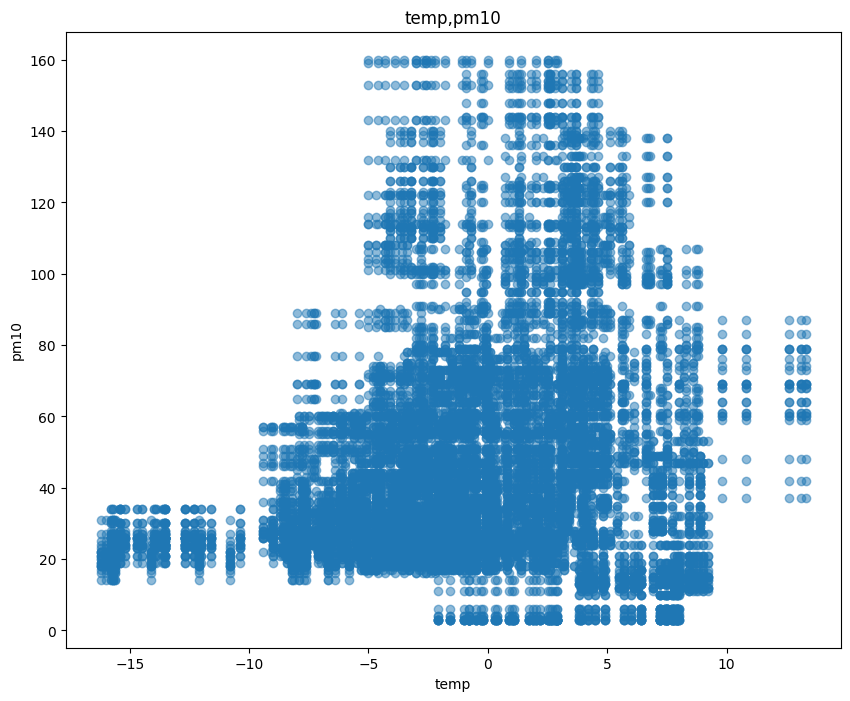

In [66]:
plt.figure(figsize=(10,8))
x=df['temp']
y=df['PM10']
plt.plot(x,y,marker='o', linestyle='none',alpha=0.5)
plt.title('temp,pm10')
plt.xlabel('temp')
plt.ylabel('pm10')
plt.show()
#온도와 미세먼지는 별 상관이 없음을 알 수 있다.

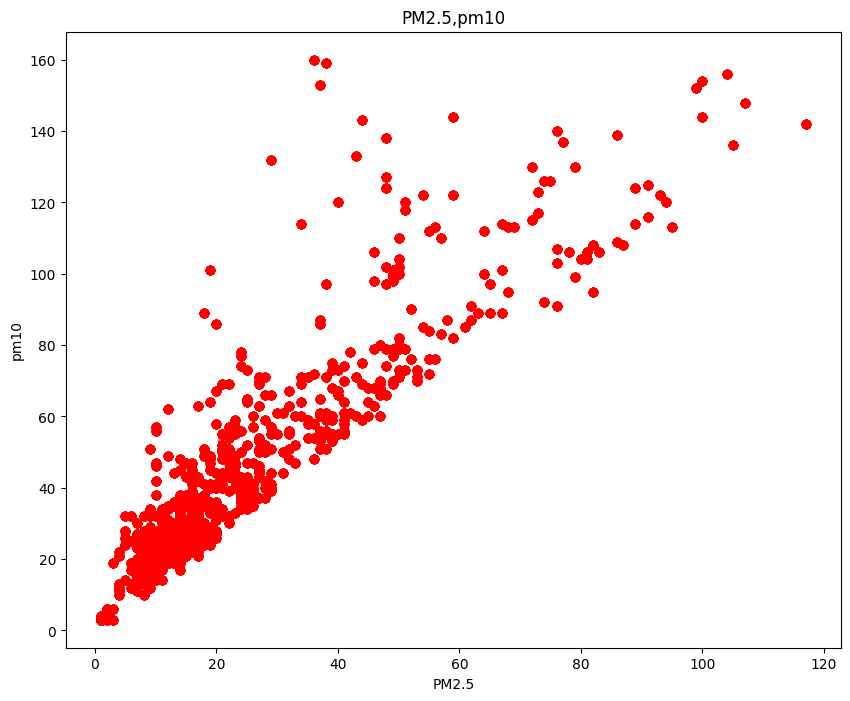

In [67]:
plt.figure(figsize=(10,8))
x=df['PM2.5']
y=df['PM10']
plt.plot(x,y,marker='o', linestyle='none',color='red',alpha=0.5)
plt.title('PM2.5,pm10')
plt.xlabel('PM2.5')
plt.ylabel('pm10')
plt.show()
#산점도 그래프 확인 결과, 미세먼지와 초미세먼지가 선형성을 가지는 것이 확인되어 상관관계가 상당히 높은 것을 확인할 수 있다.

ValueError: cannot reindex on an axis with duplicate labels

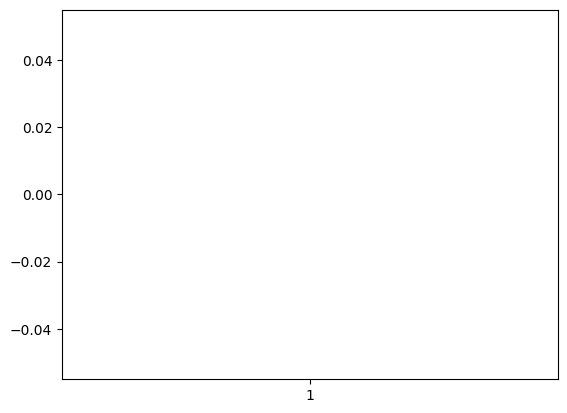

In [71]:
sns.barplot(x='month',y='PM10',data=df)